# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta, datetime

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
data_table = soup.find("table", class_ ="table")

print(data_table.text)



id
terrestrial_date
sol
ls
month
min_temp
pressure


2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169
6
-73.0
750.0


179
2012-09-13
37
170
6
-73.0
750.0


180
2012-09-14
38
171
6
-73.0
750.0


181


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list
weather_table = []

# Loop through the scraped data to create a list of rows
rows = data_table.find_all("tr")
for row in rows:
    cells = row.find_all(["th", "td"])
    
    # Extract the text from each cell and store in a list
    row_data = [cell.text.strip() for cell in cells]
    weather_table.append(row_data)

# Print the extracted data
print(weather_table)

[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'], ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', 

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = weather_table[0]
data_rows = weather_table[1:]
mars_weather_df = pd.DataFrame(data_rows, columns=columns)

In [10]:
# Confirm DataFrame was created successfully
print(mars_weather_df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
print(mars_weather_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [12]:
# Change data types for data analysis
mars_weather_df["terrestrial_date"] = mars_weather_df["terrestrial_date"].astype("datetime64[ns]")
mars_weather_df["sol"] = mars_weather_df["sol"].astype("int")
mars_weather_df["ls"] = mars_weather_df["ls"].astype("int")
mars_weather_df["month"] = mars_weather_df["month"].astype("int")
mars_weather_df["min_temp"] = mars_weather_df["min_temp"].astype("float")
mars_weather_df["pressure"] = mars_weather_df["pressure"].astype("float")



In [13]:
# Confirm type changes were successful by examining data types again
print(mars_weather_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
month_count = mars_weather_df["month"].nunique()
print(f"There are {month_count} months on Mars")

There are 12 months on Mars


In [15]:
# 2. How many sols (Martian days) worth of data are there?
martian_days = mars_weather_df["sol"].count()
print(f"There is {martian_days} sols worth of data")

There is 1867 sols worth of data


In [16]:
# 3. What is the average minimum temperature by month?
avg_min_temp = mars_weather_df.groupby("month")["min_temp"].mean()
print(avg_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


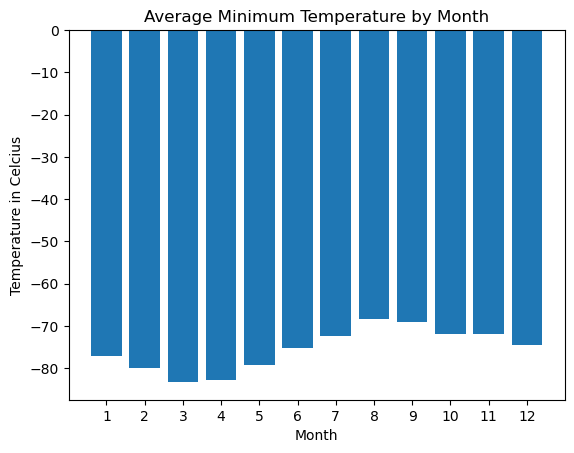

In [17]:
# Plot the average minimum temperature by month
plt.bar(avg_min_temp.index, avg_min_temp.values)
plt.title("Average Minimum Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Temperature in Celcius")

plt.xticks(avg_min_temp.index)
plt.show()


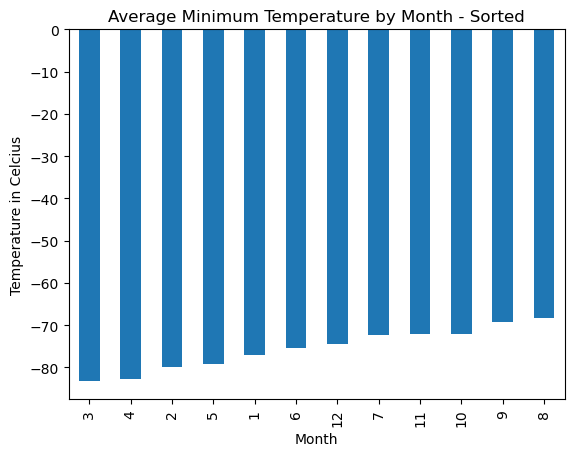

In [18]:
avg_min_temp = mars_weather_df.groupby('month')['min_temp'].mean()
avg_min_temp = avg_min_temp.sort_values()
avg_min_temp.plot(kind='bar', xlabel='Month', ylabel='Temperature in Celcius')
plt.title('Average Minimum Temperature by Month - Sorted')
plt.show()

In [19]:
# 4. What is the average pressure by month?
avg_pressure = mars_weather_df.groupby("month")["pressure"].mean()
print(avg_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


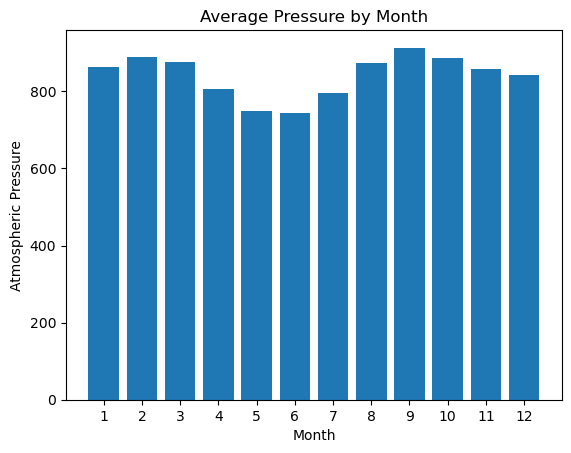

In [20]:
# Plot the average pressure by month

plt.bar(avg_pressure.index, avg_pressure.values)
plt.title("Average Pressure by Month")
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")

plt.xticks(avg_pressure.index)
plt.show()

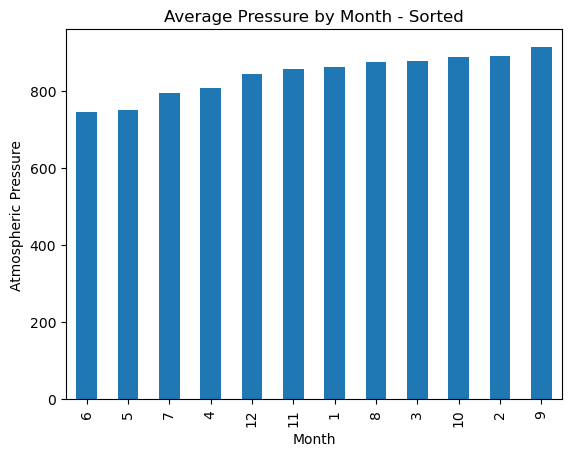

In [21]:
avg_pressure = avg_pressure.sort_values()
avg_pressure.plot(kind='bar', xlabel='Month', ylabel='Atmospheric Pressure')
plt.title('Average Pressure by Month - Sorted')
plt.show()

In [22]:
print(mars_weather_df.columns)

Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'], dtype='object')


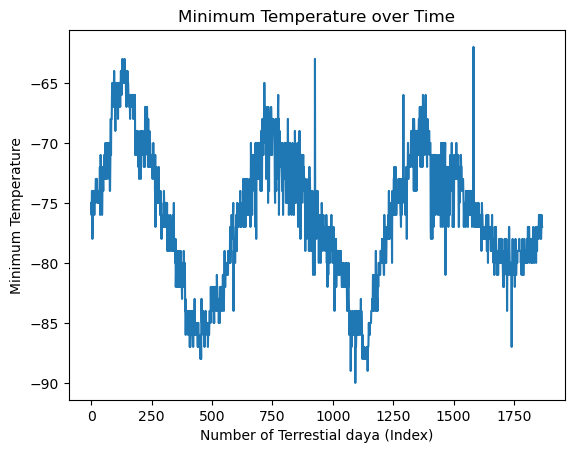

In [23]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# Plot using the index as the x-axis
mars_weather_df["min_temp"].plot(kind="line", title="Minimum Temperature over Time")

# Add labels
plt.xlabel("Number of Terrestial daya (Index)")
plt.ylabel("Minimum Temperature")

plt.show()


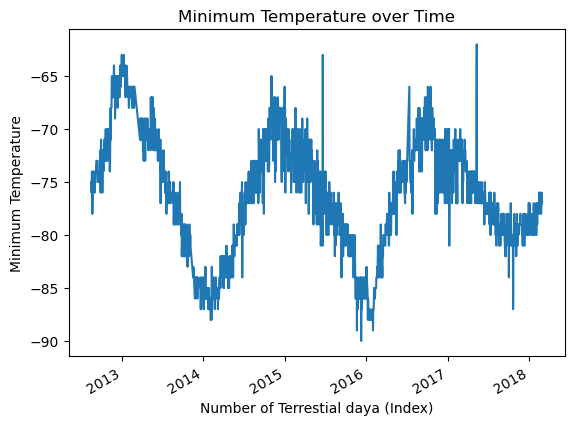

In [24]:
# Plot using the index as the x-axis
mars_weather_df.set_index("terrestrial_date", inplace=True)
mars_weather_df["min_temp"].plot(kind="line", title="Minimum Temperature over Time")

# Add labels
plt.xlabel("Number of Terrestial daya (Index)")
plt.ylabel("Minimum Temperature")

plt.show()

#### Minimum Temperature

Month 3 has the coldest recorded temperatures on Mars.  Month 8 is the warmest month on Mars, with warm being a relative term, since even at its warmest, the temperatures are still well below freezing.

#### Atmospheric Pressure

Month 6 has the lowest atmospheric pressure, followed closely by month 5 which is within 5 points.  Month 9 has the highest atmospheric pressure.

#### Year Length

Based on the visual evidence of occurence of the low "seasons", I estimate a martian year to be approximately 660 earth days.  The first low depth occurs at around Day 475, followed by another low depth at 1125, and then again at 1750.  This calculates 2 650 and 625 days during each span or an average of about 637 days.  This observation is substantiated by the 2nd graph which show a period of approximately 22 months between each low poin.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [25]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_weather_data.csv', index=False)

print("Data exported successfully to mars_weather_data.csv")

Data exported successfully to mars_weather_data.csv


In [22]:
browser.quit()